### Import Functions

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

### Generating Dataframes of Pollutant v Ecosystem Component Relationships 

Herbivores (strength = 1)

In [98]:
def herb_eco(xhB, xhG, xhS, xeB, xeG, xeS):

    
    hB_values = []
    hG_values = []
    hS_values = []
    
    eB_values = []
    eG_values = []
    eS_values = []

    
    xhB = xhB
    xhG = xhG
    xhS = xhS
    xeB = xeB
    xeG = xeG
    xeS = xeS

    
    nutr_value = np.linspace(0, 100, 101)
    nutr_max = 100

    sed_value = np.linspace(0, 100, 101)
    sed_max = 100

    
    for sed in sed_value:
        
        for nutr in nutr_value:

            
            #Sediment v. Herbivory Rate Association
            hB_min = 0
            hB_max = 1
            hB = hB_min + (hB_max - hB_min)*(((sed_max-sed)/100)**xhB)

            hG_min = 0
            hG_max = 1
            hG = hG_min + (hG_max - hG_min)*(((sed_max-sed)/100)**xhG)

            hS_min = 0
            hS_max = 1
            hS = hS_min + (hS_max - hS_min)*(((sed_max-sed)/100)**xhS)

            
            #Sediment v. Emigration Rate Association
            eB_min = 0
            eB_max = 0.9
            eB = eB_max + (eB_min - eB_max)*(((sed_max-sed)/100)**xeB)
            
            eG_min = 0
            eG_max = 0.9
            eG = eG_max + (eG_min - eG_max)*(((sed_max-sed)/100)**xeG)
            
            eS_min = 0
            eS_max = 0.9
            eS = eS_max + (eS_min - eS_max)*(((sed_max-sed)/100)**xeS)

            
            hB_values.append((sed, nutr, hB))
            hG_values.append((sed, nutr, hG))
            hS_values.append((sed, nutr, hS))
            
            eB_values.append((sed, nutr, eB))
            eG_values.append((sed, nutr, eG))
            eS_values.append((sed, nutr, eS))

    
    hB_values = pd.DataFrame(hB_values, columns=['sed', 'nutr', 'hB'])
    hG_values = pd.DataFrame(hG_values, columns=['sed', 'nutr', 'hG'])
    hS_values = pd.DataFrame(hS_values, columns=['sed', 'nutr', 'hS'])

    eB_values = pd.DataFrame(eB_values, columns=['sed', 'nutr', 'eB'])
    eG_values = pd.DataFrame(eG_values, columns=['sed', 'nutr', 'eG'])
    eS_values = pd.DataFrame(eS_values, columns=['sed', 'nutr', 'eS'])


    hB_values.to_pickle(f"hB_strength{xhB}_011526")
    hG_values.to_pickle(f"hG_strength{xhG}_011526")
    hS_values.to_pickle(f"hS_strength{xhS}_011526")
    
    eB_values.to_pickle(f"eB_strength{xeB}_011526")
    eG_values.to_pickle(f"eG_strength{xeG}_011526")
    eS_values.to_pickle(f"eS_strength{xeS}_011526")


herb_eco(1, 1, 1, 1, 1, 1)

In [99]:
base_path = (
    "C:/Users/gails/Desktop/Team Sediment/"
    "Chapter 1 - Theory/Current Analyses/"
    "Adding Nutrient & Sediment Associations/"
)

hB_strength1 = pd.read_pickle(f"{base_path}hB_strength1_011526")
hG_strength1 = pd.read_pickle(f"{base_path}hG_strength1_011526")
hS_strength1 = pd.read_pickle(f"{base_path}hS_strength1_011526")

eB_strength1 = pd.read_pickle(f"{base_path}eB_strength1_011526")
eG_strength1 = pd.read_pickle(f"{base_path}eG_strength1_011526")
eS_strength1 = pd.read_pickle(f"{base_path}eS_strength1_011526")


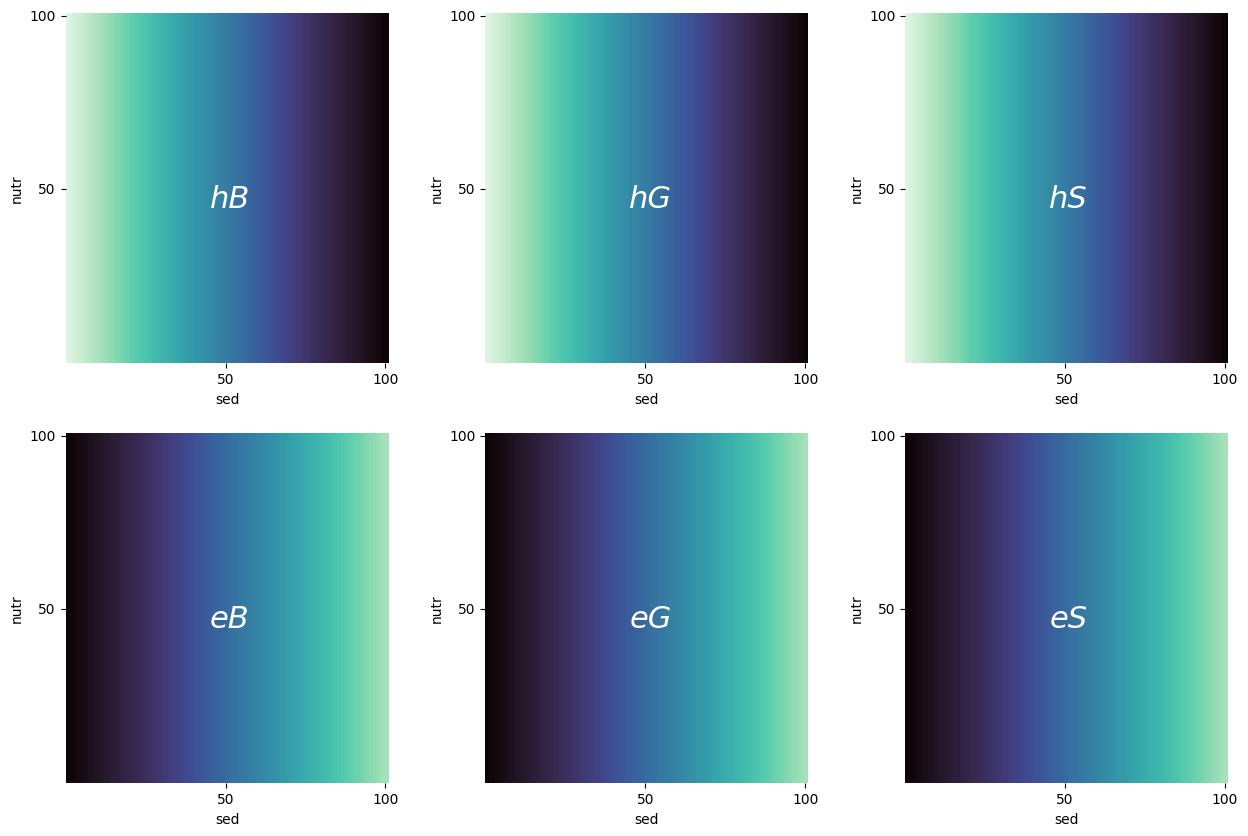

In [100]:
def plot_heatmap(df, value_col, ax, vmin, vmax):
    heatmap_df = df.pivot(index="nutr", columns="sed", values=value_col)

    hm = sns.heatmap(
        heatmap_df,
        ax=ax,
        cmap="mako",
        vmin=vmin,
        vmax=vmax,
        cbar=False
    )

    ax.set_xticks([50, 100])
    ax.set_yticks([50, 100])

    ax.set_xticklabels(['50', '100'])
    ax.set_yticklabels(['50', '100'])

    ax.set_xticklabels(hm.get_xmajorticklabels(), fontsize=10, rotation=0)
    ax.set_yticklabels(hm.get_ymajorticklabels(), fontsize=10, rotation=0)

    ax.set_ylim(ax.get_ylim()[::-1])

    ax.annotate(value_col, xy=(45, 45), color = 'white', fontsize=22, style='italic')


fig, axes = plt.subplots(
    2, 3, figsize=(15, 10),
    gridspec_kw={"wspace": 0.3})


plot_heatmap(hB_strength1, "hB", axes[0, 0], 0, 1)
plot_heatmap(hG_strength1, "hG", axes[0, 1], 0, 1)
plot_heatmap(hS_strength1, "hS", axes[0, 2], 0, 1)

plot_heatmap(eB_strength1, "eB", axes[1, 0], 0, 1)
plot_heatmap(eG_strength1, "eG", axes[1, 1], 0, 1)
plot_heatmap(eS_strength1, "eS", axes[1, 2], 0, 1)


Benthos (strength = 1)

In [101]:
def bentho_eco(xμC, xrM, xrT):

    
    μC_values = []
    rM_values = []
    rT_values = []
    
    xμC = xμC
    xrM = xrM
    xrT = xrT
    
    
    nutr_value = np.linspace(0, 100, 101)
    nutr_max = 100

    sed_value = np.linspace(0, 100, 101)
    sed_max = 100

    
    for sed in sed_value:
        
        for nutr in nutr_value:

            
            # Sediment v. Coral Mortality Rate Association
            μC_min = 0.02
            μC_max = 0.1
            μC = μC_max + (μC_min - μC_max)*(((sed_max-sed)/100)**xμC)
            
            # Nutrient v. Macroalgae Growth Rate Association
            rM_min = 0.05
            rM_max = 0.4
            rM = rM_max + (rM_min - rM_max)*(((nutr_max-nutr)/100)**xrM)
            
            # Nutrient v. Turf Algae Growth Rate Association
            rT_min = 2
            rT_max = 20
            rT = rT_max + (rT_min - rT_max)*(((nutr_max-nutr)/100)**xrT)
    
                
            μC_values.append((sed, nutr, μC))
            rM_values.append((sed, nutr, rM))
            rT_values.append((sed, nutr, rT))
            
    
    μC_values = pd.DataFrame(μC_values, columns=['sed', 'nutr', 'μC'])
    rM_values = pd.DataFrame(rM_values, columns=['sed', 'nutr', 'rM'])
    rT_values = pd.DataFrame(rT_values, columns=['sed', 'nutr', 'rT'])
    

    μC_values.to_pickle(f"μC_strength{xμC}_011526")
    rM_values.to_pickle(f"rM_strength{xrM}_011526")
    rT_values.to_pickle(f"rT_strength{xrT}_011526")


bentho_eco(1, 1, 1)

In [102]:
base_path = (
    "C:/Users/gails/Desktop/Team Sediment/"
    "Chapter 1 - Theory/Current Analyses/"
    "Adding Nutrient & Sediment Associations/"
)

μC_strength1 = pd.read_pickle(f"{base_path}μC_strength1_011526")
rM_strength1 = pd.read_pickle(f"{base_path}rM_strength1_011526")
rT_strength1 = pd.read_pickle(f"{base_path}rT_strength1_011526")

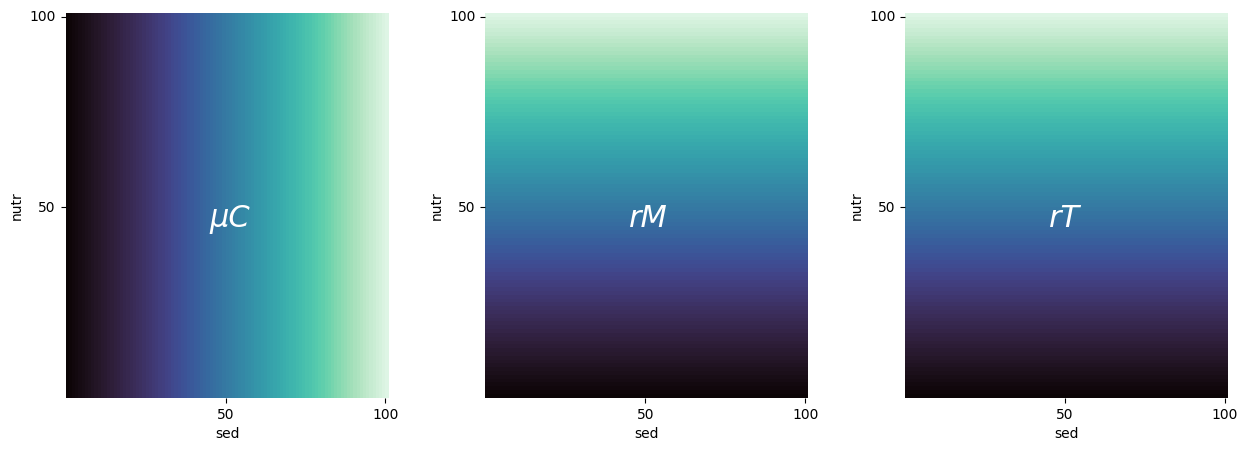

In [109]:
fig, axes = plt.subplots(
    1, 3, figsize=(15, 5),
    gridspec_kw={"wspace": 0.3})

plot_heatmap(μC_strength1, "μC", axes[0], 0.02, 0.1)
plot_heatmap(rM_strength1, "rM", axes[1], 0.05, 0.4)
plot_heatmap(rT_strength1, "rT", axes[2], 2, 20)